# PREPARA√á√ÉO DE DADOS ‚öí

1. EXTRA√á√ÉO DOS DADOS TRATADOS

In [21]:
# Importando a biblioteca pandas para manipula√ß√£o de dados
import pandas as pd

# --- ETAPA 1: CARREGANDO OS DADOS TRATADOS ---

nome_do_arquivo = "churn_dados_tratados.csv"

# Tenta carregar o arquivo CSV para um novo DataFrame chamado 'df_modelo'
try:
    df_modelo = pd.read_csv(nome_do_arquivo)

    # --- VERIFICA√á√ÉO INICIAL ---
    #garantir que tudo foi carregado corretamente.

    print(f"Arquivo '{nome_do_arquivo}' carregado com sucesso!")

    print("\nVisualiza√ß√£o das 5 primeiras linhas do DataFrame:")
    # A fun√ß√£o display() formata a tabela de forma mais leg√≠vel no notebook
    display(df_modelo.head())

    print("\n\nInforma√ß√µes gerais e tipos de dados do DataFrame:")
    df_modelo.info()

except FileNotFoundError:
    print(f"ERRO: O arquivo '{nome_do_arquivo}' n√£o foi encontrado.")
    print("Por favor, certifique-se de que voc√™ fez o upload do arquivo para o ambiente do Colab.")

Arquivo 'churn_dados_tratados.csv' carregado com sucesso!

Visualiza√ß√£o das 5 primeiras linhas do DataFrame:


ID_Cliente  Churn  Genero  Idoso  Possui_Parceiro  Possui_Dependentes  \
0  0002-ORFBO      0  Female      0                1                   1   
1  0003-MKNFE      0    Male      0                0                   0   
2  0004-TLHLJ      1    Male      0                0                   0   
3  0011-IGKFF      1    Male      1                1                   0   
4  0013-EXCHZ      1  Female      1                1                   0   

   Tempo_de_Contrato_Meses  Servico_Telefonico  Multiplas_Linhas  \
0                        9                   1                 0   
1                        9                   1                 1   
2                        4                   1                 0   
3                       13                   1                 0   
4                        3                   1                 0   

  Servico_de_Internet  ...  Protecao_de_Dispositivo  Suporte_Tecnico  \
0                 DSL  ...                        0                1   
1                 DSL  ...                        0                0   
2         Fiber optic  ...                        1                0   
3         Fiber optic  ...                        1                0   
4         Fiber optic  ...                        0                1   

   Streaming_de_TV  Streaming_de_Filmes  Tipo_de_Contrato  Fatura_Online  \
0                1                    0          One year              1   
1                0                    1    Month-to-month              0   
2                0                    0    Month-to-month              1   
3                1                    1    Month-to-month              1   
4                1                    0    Month-to-month              1   

  Metodo_de_Pagamento  Gasto_Mensal Gasto_Total  Contas_Diarias  
0        Mailed check          65.6      593.30        2.186667  
1        Mailed check          59.9      542.40        1.996667  
2    Electronic check          73.9      280.85        2.463333  
3    Electronic check          98.0     1237.85        3.266667  
4        Mailed check          83.9      267.40        2.796667  

[5 rows x 22 columns]



Informa√ß√µes gerais e tipos de dados do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7043 non-null   object 
 1   Churn                    7043 non-null   int64  
 2   Genero                   7043 non-null   object 
 3   Idoso                    7043 non-null   int64  
 4   Possui_Parceiro          7043 non-null   int64  
 5   Possui_Dependentes       7043 non-null   int64  
 6   Tempo_de_Contrato_Meses  7043 non-null   int64  
 7   Servico_Telefonico       7043 non-null   int64  
 8   Multiplas_Linhas         7043 non-null   int64  
 9   Servico_de_Internet      7043 non-null   object 
 10  Seguranca_Online         7043 non-null   int64  
 11  Backup_Online            7043 non-null   int64  
 12  Protecao_de_Dispositivo  7043 non-null   int64  
 13  Suporte_Tecnico         

2. Remo√ß√£o de Colunas Irrelevantes

In [22]:
# --- ETAPA 2: REMO√á√ÉO DE COLUNAS IRRELEVANTES ---

# O 'try...except' garante que o c√≥digo n√£o dar√° erro se a c√©lula for executada mais de uma vez.
try:
    # A coluna 'ID_Cliente' √© um identificador √∫nico e n√£o ajuda o modelo a prever o churn.
    # Vamos remov√™-la para a fase de modelagem.
    df_modelo = df_modelo.drop(columns=['ID_Cliente'])

    print("--- DataFrame ap√≥s remover a coluna 'ID_Cliente' ---")
    print("Coluna 'ID_Cliente' removida com sucesso.")

    print("\nVisualiza√ß√£o das 5 primeiras linhas do DataFrame atualizado:")
    display(df_modelo.head())

except KeyError:
    print("Aviso: A coluna 'ID_Cliente' j√° foi removida anteriormente.")
except NameError:
    print("ERRO: O DataFrame 'df_modelo' n√£o foi encontrado. Por favor, execute a c√©lula anterior (Etapa 1) primeiro.")

--- DataFrame ap√≥s remover a coluna 'ID_Cliente' ---
Coluna 'ID_Cliente' removida com sucesso.

Visualiza√ß√£o das 5 primeiras linhas do DataFrame atualizado:


Churn  Genero  Idoso  Possui_Parceiro  Possui_Dependentes  \
0      0  Female      0                1                   1   
1      0    Male      0                0                   0   
2      1    Male      0                0                   0   
3      1    Male      1                1                   0   
4      1  Female      1                1                   0   

   Tempo_de_Contrato_Meses  Servico_Telefonico  Multiplas_Linhas  \
0                        9                   1                 0   
1                        9                   1                 1   
2                        4                   1                 0   
3                       13                   1                 0   
4                        3                   1                 0   

  Servico_de_Internet  Seguranca_Online  ...  Protecao_de_Dispositivo  \
0                 DSL                 0  ...                        0   
1                 DSL                 0  ...                        0   
2         Fiber optic                 0  ...                        1   
3         Fiber optic                 0  ...                        1   
4         Fiber optic                 0  ...                        0   

   Suporte_Tecnico  Streaming_de_TV  Streaming_de_Filmes  Tipo_de_Contrato  \
0                1                1                    0          One year   
1                0                0                    1    Month-to-month   
2                0                0                    0    Month-to-month   
3                0                1                    1    Month-to-month   
4                1                1                    0    Month-to-month   

  Fatura_Online  Metodo_de_Pagamento Gasto_Mensal  Gasto_Total  Contas_Diarias  
0             1         Mailed check         65.6       593.30        2.186667  
1             0         Mailed check         59.9       542.40        1.996667  
2             1     Electronic check         73.9       280.85        2.463333  
3             1     Electronic check         98.0      1237.85        3.266667  
4             1         Mailed check         83.9       267.40        2.796667  

[5 rows x 21 columns]

3. Encoding

In [23]:
# --- ETAPA 3: ENCODING DE VARI√ÅVEIS CATEG√ìRICAS ---

# O try...except garante que o c√≥digo n√£o dar√° erro se a c√©lula for executada mais de uma vez
# ou se o DataFrame n√£o existir.
try:
    # Identificamos as colunas que ainda s√£o do tipo 'object' (texto) e precisam ser convertidas.
    colunas_para_codificar = df_modelo.select_dtypes(include=['object']).columns

    print(f"Colunas a serem codificadas: {list(colunas_para_codificar)}")

    # Utilizamos a fun√ß√£o 'get_dummies' do Pandas para aplicar o one-hot encoding.
    # 'drop_first=True' remove a primeira categoria de cada vari√°vel para evitar multicolinearidade,
    # uma boa pr√°tica em modelagem.
    df_modelo = pd.get_dummies(df_modelo, columns=colunas_para_codificar, drop_first=True)

    print("\n--- DataFrame ap√≥s o Encoding ---")
    print("Vari√°veis categ√≥ricas convertidas para formato num√©rico.")

    print("\nVisualiza√ß√£o das 5 primeiras linhas do DataFrame transformado:")
    display(df_modelo.head())

    print("\nNovas informa√ß√µes do DataFrame:")
    df_modelo.info()

except NameError:
    print("ERRO: O DataFrame 'df_modelo' n√£o foi encontrado. Por favor, execute as c√©lulas anteriores primeiro.")

Colunas a serem codificadas: ['Genero', 'Servico_de_Internet', 'Tipo_de_Contrato', 'Metodo_de_Pagamento']

--- DataFrame ap√≥s o Encoding ---
Vari√°veis categ√≥ricas convertidas para formato num√©rico.

Visualiza√ß√£o das 5 primeiras linhas do DataFrame transformado:


Churn  Idoso  Possui_Parceiro  Possui_Dependentes  Tempo_de_Contrato_Meses  \
0      0      0                1                   1                        9   
1      0      0                0                   0                        9   
2      1      0                0                   0                        4   
3      1      1                1                   0                       13   
4      1      1                1                   0                        3   

   Servico_Telefonico  Multiplas_Linhas  Seguranca_Online  Backup_Online  \
0                   1                 0                 0              1   
1                   1                 1                 0              0   
2                   1                 0                 0              0   
3                   1                 0                 0              1   
4                   1                 0                 0              0   

   Protecao_de_Dispositivo  ...  Gasto_Total  Contas_Diarias  Genero_Male  \
0                        0  ...       593.30        2.186667        False   
1                        0  ...       542.40        1.996667         True   
2                        1  ...       280.85        2.463333         True   
3                        1  ...      1237.85        3.266667         True   
4                        0  ...       267.40        2.796667        False   

   Servico_de_Internet_Fiber optic  Servico_de_Internet_No  \
0                            False                   False   
1                            False                   False   
2                             True                   False   
3                             True                   False   
4                             True                   False   

   Tipo_de_Contrato_One year  Tipo_de_Contrato_Two year  \
0                       True                      False   
1                      False                      False   
2                      False                      False   
3                      False                      False   
4                      False                      False   

   Metodo_de_Pagamento_Credit card (automatic)  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   Metodo_de_Pagamento_Electronic check  Metodo_de_Pagamento_Mailed check  
0                                 False                              True  
1                                 False                              True  
2                                  True                             False  
3                                  True                             False  
4                                 False                              True  

[5 rows x 25 columns]


Novas informa√ß√µes do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Churn                                        7043 non-null   int64  
 1   Idoso                                        7043 non-null   int64  
 2   Possui_Parceiro                              7043 non-null   int64  
 3   Possui_Dependentes                           7043 non-null   int64  
 4   Tempo_de_Contrato_Meses                      7043 non-null   int64  
 5   Servico_Telefonico                           7043 non-null   int64  
 6   Multiplas_Linhas                             7043 non-null   int64  
 7   Seguranca_Online                             7043 non-null   int64  
 8   Backup_Online                                7043 non-null   int64  
 9   Protecao_de_Dispositivo                

4. Verifica√ß√£o da Propor√ß√£o de Evas√£o

In [24]:
# --- ETAPA 4: VERIFICA√á√ÉO DA PROPOR√á√ÉO DE EVAS√ÉO (CHURN) ---

try:
    # Usamos o m√©todo value_counts() para contar as ocorr√™ncias de cada classe na coluna 'Churn'.
    # 0 = N√£o Evadiu, 1 = Evadiu
    contagem_churn = df_modelo['Churn'].value_counts()

    # Para obter a propor√ß√£o, usamos o par√¢metro normalize=True.
    # O resultado √© multiplicado por 100 para visualizarmos como porcentagem.
    proporcao_churn = df_modelo['Churn'].value_counts(normalize=True) * 100

    print("--- An√°lise da Propor√ß√£o da Vari√°vel Alvo (Churn) ---")

    print("\nContagem absoluta de cada classe:")
    print(f"Clientes que N√£o Evadiram (0): {contagem_churn[0]}")
    print(f"Clientes que Evadiram (1):    {contagem_churn[1]}")

    print("\nPropor√ß√£o de cada classe (%):")
    print(f"Clientes que N√£o Evadiram (0): {proporcao_churn[0]:.2f}%")
    print(f"Clientes que Evadiram (1):    {proporcao_churn[1]:.2f}%")

    print("\n\n--- Avalia√ß√£o do Desequil√≠brio ---")
    print("O dataset √© considerado desbalanceado.")
    print("A classe majorit√°ria ('N√£o Evadiu') representa aproximadamente 73.5% dos dados, enquanto a classe minorit√°ria ('Evadiu') representa cerca de 26.5%.")
    print("Este desequil√≠brio deve ser levado em conta ao treinar e avaliar os modelos, utilizando m√©tricas apropriadas como Precis√£o, Recall, F1-Score e a √°rea sob a curva ROC, al√©m da acur√°cia.")

except NameError:
    print("ERRO: O DataFrame 'df_modelo' n√£o foi encontrado. Por favor, execute as c√©lulas anteriores primeiro.")

--- An√°lise da Propor√ß√£o da Vari√°vel Alvo (Churn) ---

Contagem absoluta de cada classe:
Clientes que N√£o Evadiram (0): 5174
Clientes que Evadiram (1):    1869

Propor√ß√£o de cada classe (%):
Clientes que N√£o Evadiram (0): 73.46%
Clientes que Evadiram (1):    26.54%


--- Avalia√ß√£o do Desequil√≠brio ---
O dataset √© considerado desbalanceado.
A classe majorit√°ria ('N√£o Evadiu') representa aproximadamente 73.5% dos dados, enquanto a classe minorit√°ria ('Evadiu') representa cerca de 26.5%.
Este desequil√≠brio deve ser levado em conta ao treinar e avaliar os modelos, utilizando m√©tricas apropriadas como Precis√£o, Recall, F1-Score e a √°rea sob a curva ROC, al√©m da acur√°cia.


BALANCEAMENTO DE CLASSES(OPCIONAL)

In [25]:
# --- ETAPA 4: VERIFICA√á√ÉO DA PROPOR√á√ÉO E BALANCEAMENTO DE CLASSES ---

try:
    # Usamos o m√©todo value_counts() para contar as ocorr√™ncias de cada classe na coluna 'Churn'.
    # 0 = N√£o Evadiu, 1 = Evadiu
    contagem_churn = df_modelo['Churn'].value_counts()

    # Para obter a propor√ß√£o, usamos o par√¢metro normalize=True.
    # O resultado √© multiplicado por 100 para visualizarmos como porcentagem.
    proporcao_churn = df_modelo['Churn'].value_counts(normalize=True) * 100

    print("--- An√°lise da Propor√ß√£o da Vari√°vel Alvo (Churn) ---")

    print("\nContagem absoluta de cada classe:")
    print(f"Clientes que N√£o Evadiram (0): {contagem_churn[0]}")
    print(f"Clientes que Evadiram (1):    {contagem_churn[1]}")

    print("\nPropor√ß√£o de cada classe (%):")
    print(f"Clientes que N√£o Evadiram (0): {proporcao_churn[0]:.2f}%")
    print(f"Clientes que Evadiram (1):    {proporcao_churn[1]:.2f}%")

    print("\n\n--- Avalia√ß√£o do Desequil√≠brio ---")
    print("O dataset √© considerado desbalanceado.")
    print("A classe majorit√°ria ('N√£o Evadiu') representa aproximadamente 73.5% dos dados, enquanto a classe minorit√°ria ('Evadiu') representa cerca de 26.5%.")
    print("Este desequil√≠brio deve ser levado em conta ao treinar e avaliar os modelos.")

    # --- Balanceamento de Classes com SMOTE (Opcional) ---
    print("\n\n--- Balanceamento de Classes com SMOTE (Opcional) ---")
    print("Aplicando a t√©cnica de oversampling SMOTE para criar um dataset balanceado.")

    # Importando as bibliotecas necess√°rias
    from imblearn.over_sampling import SMOTE
    from collections import Counter

    # Separando as features (X) e o alvo (y) do nosso dataframe
    X = df_modelo.drop('Churn', axis=1)
    y = df_modelo['Churn']

    # Criando o objeto SMOTE
    # random_state=42 garante que os resultados sejam reprodut√≠veis
    smote = SMOTE(random_state=42)

    # Aplicando o SMOTE aos dados para gerar novas amostras da classe minorit√°ria
    X_resampled, y_resampled = smote.fit_resample(X, y)

    print("\nDistribui√ß√£o das classes ANTES do SMOTE:", Counter(y))
    print("Distribui√ß√£o das classes AP√ìS o SMOTE:", Counter(y_resampled))
    print("\nO dataset foi balanceado com sucesso. Agora temos um n√∫mero igual de amostras para cada classe.")
    print("Este novo conjunto de dados (X_resampled, y_resampled) pode ser usado opcionalmente para treinar os modelos.")


except NameError:
    print("ERRO: O DataFrame 'df_modelo' n√£o foi encontrado. Por favor, execute as c√©lulas anteriores primeiro.")
except ImportError:
    print("\nERRO DE IMPORTA√á√ÉO: A biblioteca 'imblearn' n√£o foi encontrada.")
    print("Para usar o SMOTE, voc√™ precisa instal√°-la. Execute o comando abaixo em uma c√©lula:")
    print("!pip install -U imbalanced-learn")

--- An√°lise da Propor√ß√£o da Vari√°vel Alvo (Churn) ---

Contagem absoluta de cada classe:
Clientes que N√£o Evadiram (0): 5174
Clientes que Evadiram (1):    1869

Propor√ß√£o de cada classe (%):
Clientes que N√£o Evadiram (0): 73.46%
Clientes que Evadiram (1):    26.54%


--- Avalia√ß√£o do Desequil√≠brio ---
O dataset √© considerado desbalanceado.
A classe majorit√°ria ('N√£o Evadiu') representa aproximadamente 73.5% dos dados, enquanto a classe minorit√°ria ('Evadiu') representa cerca de 26.5%.
Este desequil√≠brio deve ser levado em conta ao treinar e avaliar os modelos.


--- Balanceamento de Classes com SMOTE (Opcional) ---
Aplicando a t√©cnica de oversampling SMOTE para criar um dataset balanceado.

Distribui√ß√£o das classes ANTES do SMOTE: Counter({0: 5174, 1: 1869})
Distribui√ß√£o das classes AP√ìS o SMOTE: Counter({0: 5174, 1: 5174})

O dataset foi balanceado com sucesso. Agora temos um n√∫mero igual de amostras para cada classe.
Este novo conjunto de dados (X_resampled, y_

5. Normaliza√ß√£o ou Padroniza√ß√£o (se necess√°rio)

In [26]:
# Importando as bibliotecas necess√°rias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- ETAPA 5: DIVIS√ÉO EM TREINO/TESTE E PADRONIZA√á√ÉO DOS DADOS ---

try:
    # --- 5.1 Divis√£o em Features (X) e Alvo (y) ---
    # Vamos usar o dataset original (desbalanceado) por padr√£o.
    # Se voc√™ optar por usar os dados balanceados, substitua df_modelo por um DataFrame
    # criado a partir de X_resampled e y_resampled.

    X = df_modelo.drop('Churn', axis=1)
    y = df_modelo['Churn']

    # --- 5.2 Divis√£o em Conjuntos de Treino e Teste ---
    # 80% dos dados para treino, 20% para teste.
    # random_state=42 garante que a divis√£o seja sempre a mesma, para reprodutibilidade.
    # stratify=y garante que a propor√ß√£o de Churn seja a mesma nos conjuntos de treino e teste.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("--- Dados divididos em conjuntos de Treino e Teste ---")
    print(f"Dimens√µes de X_train: {X_train.shape}")
    print(f"Dimens√µes de X_test:  {X_test.shape}")


    # --- 5.3 Padroniza√ß√£o das Vari√°veis Num√©ricas ---
    print("\n--- Aplicando a Padroniza√ß√£o (StandardScaler) ---")

    # Identificamos as colunas que possuem uma escala maior e precisam ser padronizadas.
    # As colunas que s√£o 0 ou 1 (flags) n√£o precisam de padroniza√ß√£o.
    colunas_para_padronizar = ['Tempo_de_Contrato_Meses', 'Gasto_Mensal', 'Gasto_Total', 'Contas_Diarias']

    # Criamos o objeto normalizador (scaler)
    scaler = StandardScaler()

    # ATEN√á√ÉO: Ajustamos o scaler APENAS com os dados de TREINO.
    # Isso evita que informa√ß√µes do conjunto de teste "vazem" para o treino.
    X_train[colunas_para_padronizar] = scaler.fit_transform(X_train[colunas_para_padronizar])

    # Aplicamos a MESMA transforma√ß√£o (com o scaler j√° ajustado) nos dados de TESTE.
    X_test[colunas_para_padronizar] = scaler.transform(X_test[colunas_para_padronizar])

    print("Padroniza√ß√£o aplicada com sucesso nos conjuntos de treino e teste.")

    print("\nVisualiza√ß√£o das 5 primeiras linhas do X_train padronizado:")
    display(X_train.head())

except NameError:
    print("ERRO: O DataFrame 'df_modelo' n√£o foi encontrado. Por favor, execute as c√©lulas anteriores primeiro.")

--- Dados divididos em conjuntos de Treino e Teste ---
Dimens√µes de X_train: (5634, 24)
Dimens√µes de X_test:  (1409, 24)

--- Aplicando a Padroniza√ß√£o (StandardScaler) ---
Padroniza√ß√£o aplicada com sucesso nos conjuntos de treino e teste.

Visualiza√ß√£o das 5 primeiras linhas do X_train padronizado:


Idoso  Possui_Parceiro  Possui_Dependentes  Tempo_de_Contrato_Meses  \
3793      0                1                   0                 1.124891   
3192      0                0                   1                -0.827880   
4922      0                0                   0                -1.234707   
3926      0                1                   1                 0.026457   
3859      0                0                   1                -0.746514   

      Servico_Telefonico  Multiplas_Linhas  Seguranca_Online  Backup_Online  \
3793                   1                 1                 1              1   
3192                   1                 0                 0              0   
4922                   1                 0                 1              0   
3926                   1                 0                 1              0   
3859                   1                 1                 1              0   

      Protecao_de_Dispositivo  Suporte_Tecnico  ...  Gasto_Total  \
3793                        0                0  ...     1.398565   
3192                        0                0  ...    -0.913119   
4922                        1                0  ...    -0.946146   
3926                        1                0  ...     0.071090   
3859                        0                1  ...    -0.495126   

      Contas_Diarias  Genero_Male  Servico_de_Internet_Fiber optic  \
3793        0.968250        False                             True   
3192       -1.521717         True                            False   
4922        0.513560        False                             True   
3926        0.323690         True                            False   
3859        0.698434        False                             True   

      Servico_de_Internet_No  Tipo_de_Contrato_One year  \
3793                   False                      False   
3192                    True                      False   
4922                   False                      False   
3926                   False                       True   
3859                   False                      False   

      Tipo_de_Contrato_Two year  Metodo_de_Pagamento_Credit card (automatic)  \
3793                      False                                         True   
3192                       True                                        False   
4922                      False                                        False   
3926                      False                                         True   
3859                      False                                        False   

      Metodo_de_Pagamento_Electronic check  Metodo_de_Pagamento_Mailed check  
3793                                 False                             False  
3192                                 False                             False  
4922                                  True                             False  
3926                                 False                             False  
3859                                 False                              True  

[5 rows x 24 columns]

# üéØ Correla√ß√£o e Sele√ß√£o de Vari√°veis

1. An√°lise de Correla√ß√£o

--- Matriz de Correla√ß√£o (Heatmap) ---


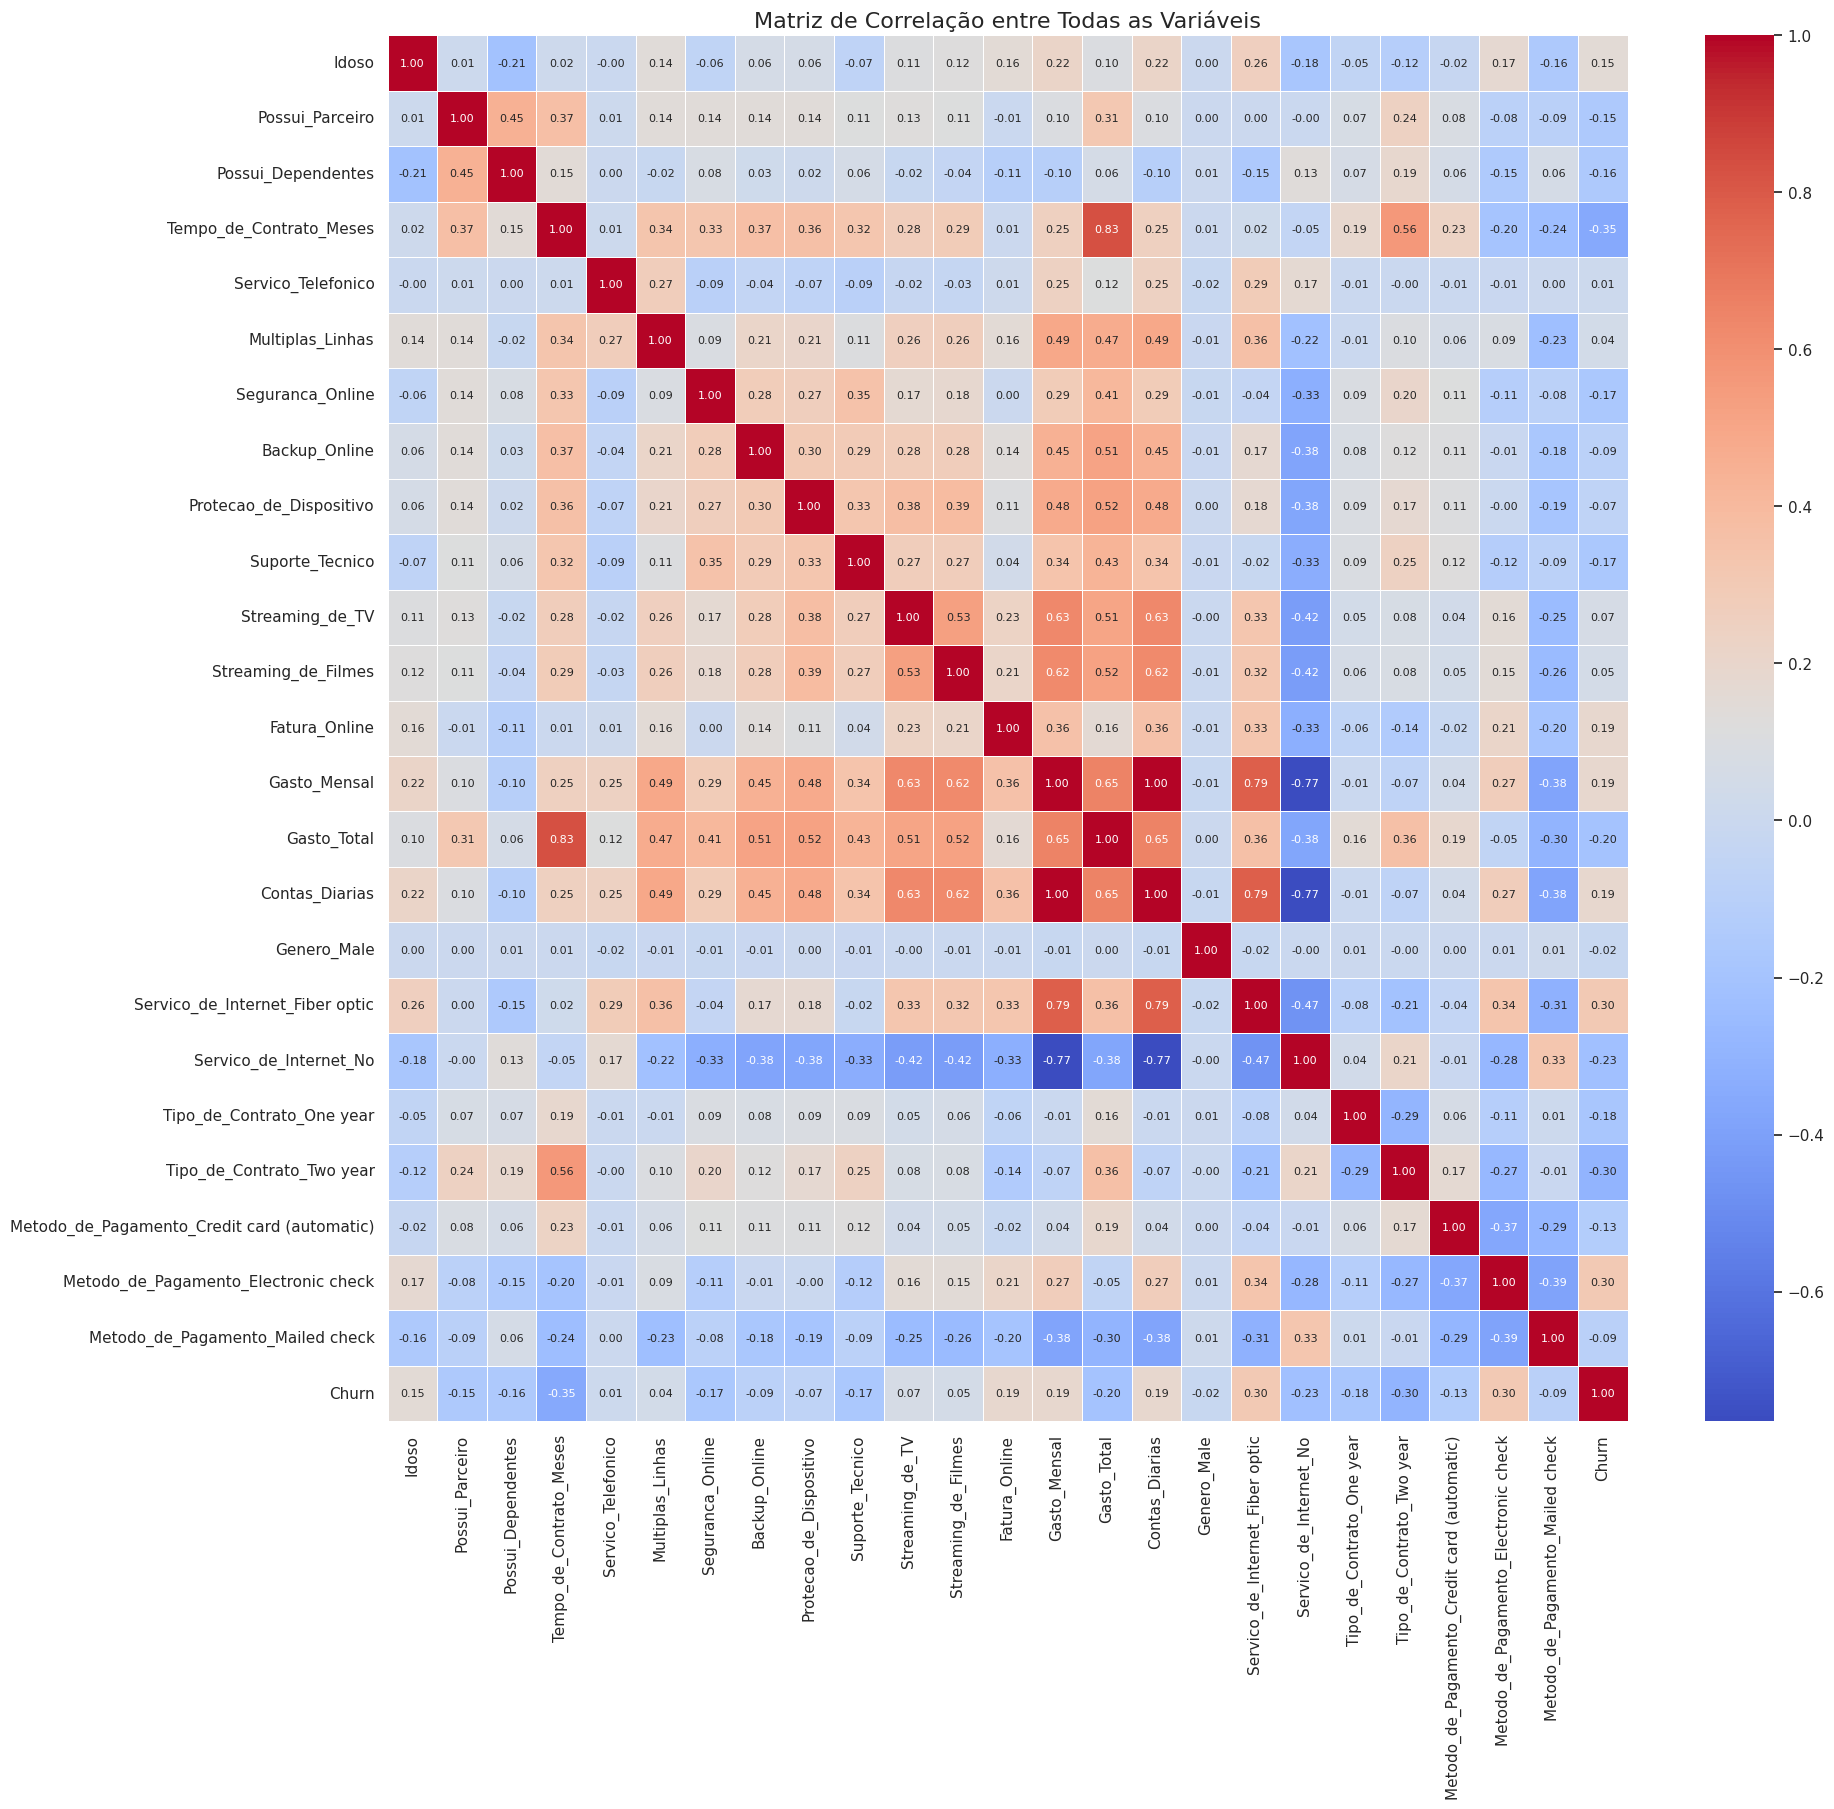


--- Correla√ß√£o de todas as vari√°veis com o Churn ---


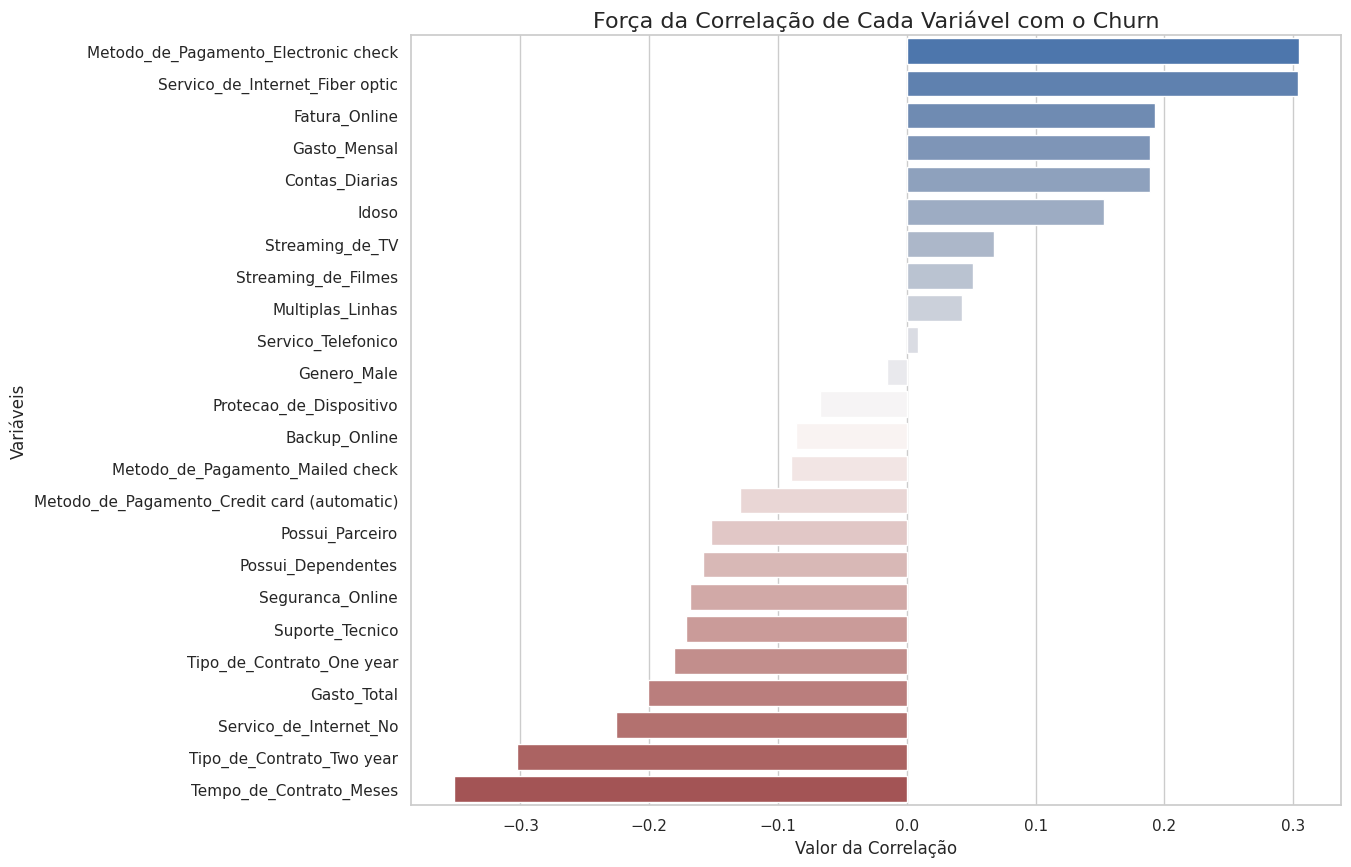

In [27]:
# Importando as bibliotecas necess√°rias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- ETAPA 6: AN√ÅLISE DE CORRELA√á√ÉO ---

try:
    # Para calcular a correla√ß√£o, precisamos juntar temporariamente X_train e y_train
    # √â uma boa pr√°tica calcular a correla√ß√£o apenas no conjunto de treino
    df_treino_corr = X_train.copy()
    df_treino_corr['Churn'] = y_train

    # --- 6.1 Visualiza√ß√£o da Matriz de Correla√ß√£o Completa (Heatmap) ---
    print("--- Matriz de Correla√ß√£o (Heatmap) ---")

    # Calcula a matriz de correla√ß√£o
    matriz_correlacao = df_treino_corr.corr()

    # Cria o mapa de calor (heatmap)
    plt.figure(figsize=(20, 18))
    sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
    plt.title('Matriz de Correla√ß√£o entre Todas as Vari√°veis', fontsize=16)
    plt.show()


    # --- 6.2 Foco na Correla√ß√£o com a vari√°vel "Churn" ---
    print("\n--- Correla√ß√£o de todas as vari√°veis com o Churn ---")

    # Pegamos a coluna 'Churn' da matriz de correla√ß√£o, removemos a correla√ß√£o dela com ela mesma (que √© 1)
    # e ordenamos os valores para melhor visualiza√ß√£o.
    corr_churn = matriz_correlacao['Churn'].drop('Churn').sort_values(ascending=False)

    plt.figure(figsize=(12, 10))
    # Usamos o hue para evitar o FutureWarning e colorir as barras
    sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='vlag', hue=corr_churn.index, legend=False)
    plt.title('For√ßa da Correla√ß√£o de Cada Vari√°vel com o Churn', fontsize=16)
    plt.xlabel('Valor da Correla√ß√£o', fontsize=12)
    plt.ylabel('Vari√°veis', fontsize=12)
    plt.show()


except NameError:
    print("ERRO: Os DataFrames 'X_train' e 'y_train' n√£o foram encontrados.")
    print("Por favor, execute a c√©lula anterior (Etapa 5) primeiro.")

2. An√°lises Direcionadas

--- An√°lise Direcionada: Tempo de Contrato vs. Evas√£o ---


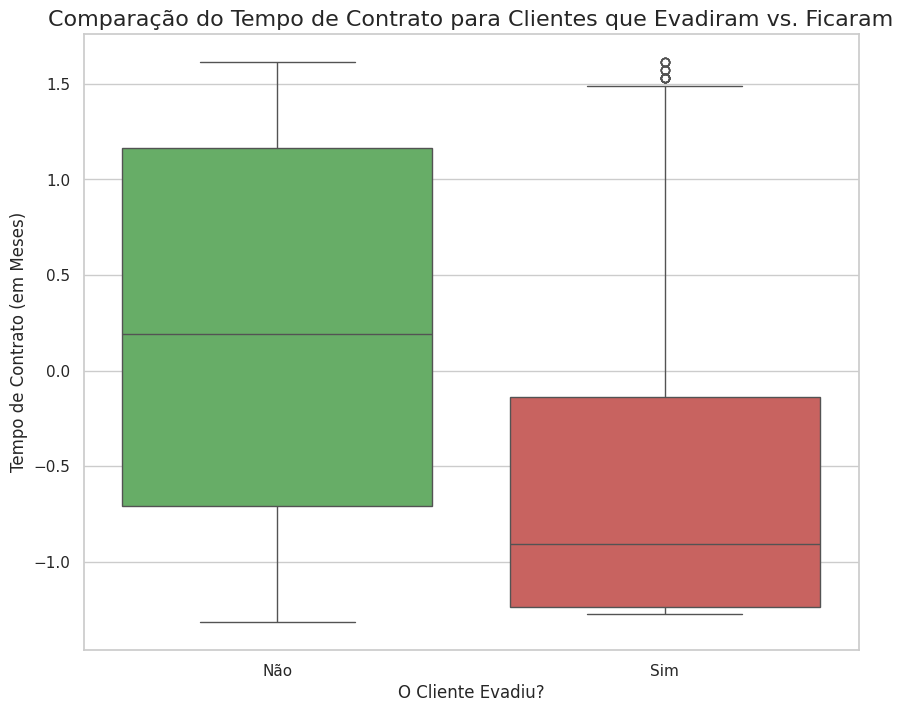


--- An√°lise Direcionada: Gasto Total vs. Evas√£o ---


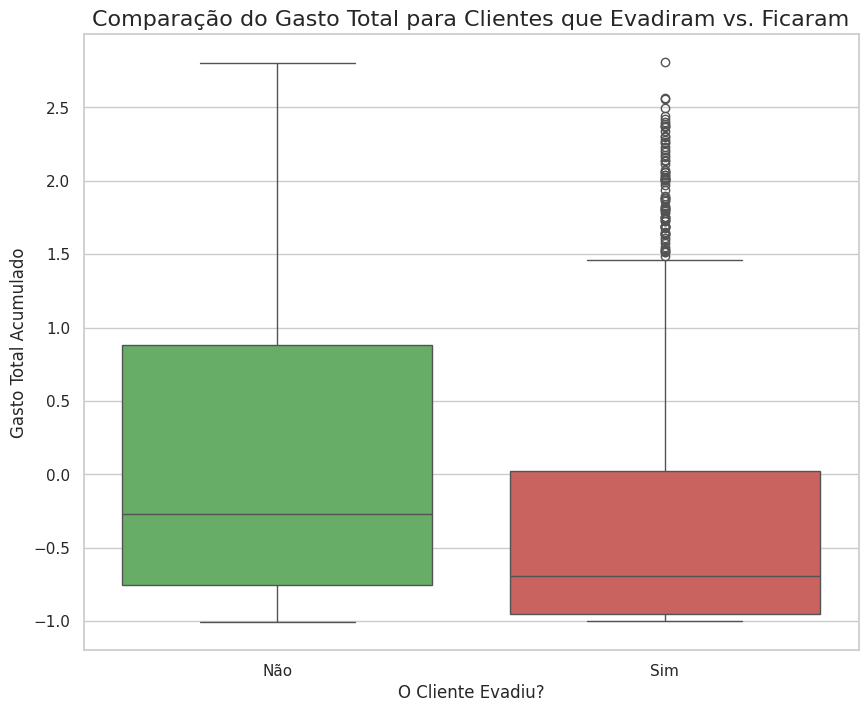

In [28]:
# Importando as bibliotecas necess√°rias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- ETAPA 7: AN√ÅLISES DIRECIONADAS ---

try:
    # Para criar os gr√°ficos, vamos usar o mesmo DataFrame de treino da etapa anterior
    # que j√° cont√©m a coluna 'Churn'.
    # Se df_treino_corr n√£o existir, n√≥s o criamos novamente.
    if 'df_treino_corr' not in locals():
        df_treino_corr = X_train.copy()
        df_treino_corr['Churn'] = y_train

    print("--- An√°lise Direcionada: Tempo de Contrato vs. Evas√£o ---")

    # --- GR√ÅFICO 1: BOXPLOT PARA TEMPO DE CONTRATO ---
    plt.figure(figsize=(10, 8))
    # Usamos o hue para evitar o FutureWarning e colorir as caixas
    sns.boxplot(x='Churn', y='Tempo_de_Contrato_Meses', data=df_treino_corr, palette=['#5cb85c', '#d9534f'], hue='Churn', legend=False)

    plt.title('Compara√ß√£o do Tempo de Contrato para Clientes que Evadiram vs. Ficaram', fontsize=16)
    plt.xlabel('O Cliente Evadiu?', fontsize=12)
    plt.ylabel('Tempo de Contrato (em Meses)', fontsize=12)
    plt.xticks([0, 1], ['N√£o', 'Sim'])
    plt.show()

    print("\n--- An√°lise Direcionada: Gasto Total vs. Evas√£o ---")

    # --- GR√ÅFICO 2: BOXPLOT PARA GASTO TOTAL ---
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Churn', y='Gasto_Total', data=df_treino_corr, palette=['#5cb85c', '#d9534f'], hue='Churn', legend=False)

    plt.title('Compara√ß√£o do Gasto Total para Clientes que Evadiram vs. Ficaram', fontsize=16)
    plt.xlabel('O Cliente Evadiu?', fontsize=12)
    plt.ylabel('Gasto Total Acumulado', fontsize=12)
    plt.xticks([0, 1], ['N√£o', 'Sim'])
    plt.show()

except NameError:
    print("ERRO: Os DataFrames de treino n√£o foram encontrados.")
    print("Por favor, execute as c√©lulas anteriores (Etapa 5 e 6) primeiro.")



# ü§ñ Modelagem Preditiva

1. Separa√ß√£o de dados

In [29]:
# Importando a fun√ß√£o necess√°ria da biblioteca Scikit-learn
from sklearn.model_selection import train_test_split
import pandas as pd

# --- ETAPA 8: SEPARA√á√ÉO DE DADOS EM TREINO E TESTE ---

try:
    print("--- Separando o DataFrame em Features (X) e Alvo (y) ---")

    # X (Features): Cont√©m todas as colunas que o modelo usar√° para fazer a previs√£o.
    # Removemos a coluna 'Churn', que √© o que queremos prever.
    X = df_modelo.drop('Churn', axis=1)

    # y (Alvo/Target): Cont√©m apenas a coluna que queremos prever.
    y = df_modelo['Churn']

    print("Features (X) e Alvo (y) definidos com sucesso.")


    print("\n--- Dividindo os dados em conjuntos de Treino e Teste ---")

    # Utilizamos a fun√ß√£o train_test_split para dividir os dados.
    # test_size=0.2: Define que 20% dos dados ser√£o usados para teste e 80% para treino.
    # random_state=42: Garante que a divis√£o seja sempre a mesma, tornando nosso experimento reprodut√≠vel.
    # stratify=y: √â MUITO IMPORTANTE aqui. Garante que a propor√ß√£o de clientes que evadiram e n√£o evadiram
    #             seja a mesma tanto no conjunto de treino quanto no de teste, o que √© crucial para dados desbalanceados.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("Dados divididos com sucesso!")

    print("\n--- Dimens√µes dos Conjuntos de Dados ---")
    print(f"Formato de X_train (features de treino): {X_train.shape}")
    print(f"Formato de y_train (alvo de treino):    {y_train.shape}")
    print(f"Formato de X_test (features de teste):   {X_test.shape}")
    print(f"Formato de y_test (alvo de teste):     {y_test.shape}")

except NameError:
    print("ERRO: O DataFrame 'df_modelo' n√£o foi encontrado.")
    print("Por favor, execute as c√©lulas de pr√©-processamento anteriores primeiro.")

--- Separando o DataFrame em Features (X) e Alvo (y) ---
Features (X) e Alvo (y) definidos com sucesso.

--- Dividindo os dados em conjuntos de Treino e Teste ---
Dados divididos com sucesso!

--- Dimens√µes dos Conjuntos de Dados ---
Formato de X_train (features de treino): (5634, 24)
Formato de y_train (alvo de treino):    (5634,)
Formato de X_test (features de teste):   (1409, 24)
Formato de y_test (alvo de teste):     (1409,)


2. Cria√ß√£o de Modelos

--- Treinando Modelo 1: Regress√£o Log√≠stica ---
Modelo de Regress√£o Log√≠stica treinado com sucesso.

--- Treinando Modelo 2: Random Forest ---
Modelo de Random Forest treinado com sucesso.

Previs√µes realizadas nos dados de teste.


--- Resultados da Regress√£o Log√≠stica ---
Acur√°cia: 0.7913

Relat√≥rio de Classifica√ß√£o:
                precision    recall  f1-score   support

N√£o Evadiu (0)       0.84      0.89      0.86      1035
    Evadiu (1)       0.63      0.52      0.57       374

      accuracy                           0.79      1409
     macro avg       0.73      0.70      0.72      1409
  weighted avg       0.78      0.79      0.78      1409



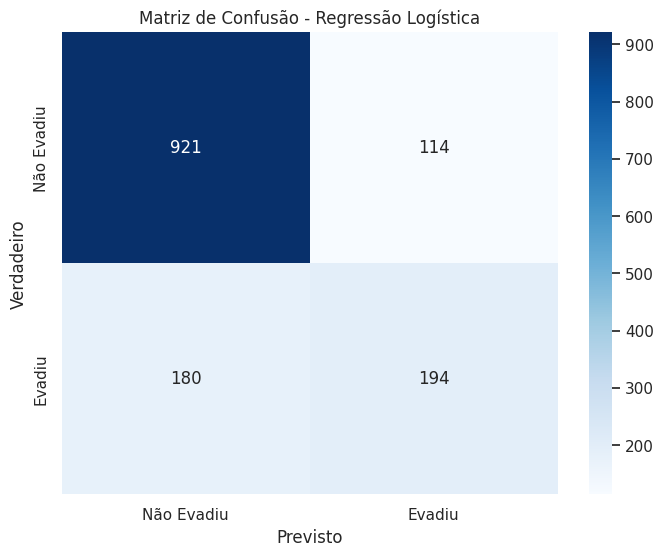



--- Resultados do Random Forest ---
Acur√°cia: 0.7899

Relat√≥rio de Classifica√ß√£o:
                precision    recall  f1-score   support

N√£o Evadiu (0)       0.83      0.90      0.86      1035
    Evadiu (1)       0.64      0.48      0.55       374

      accuracy                           0.79      1409
     macro avg       0.73      0.69      0.71      1409
  weighted avg       0.78      0.79      0.78      1409



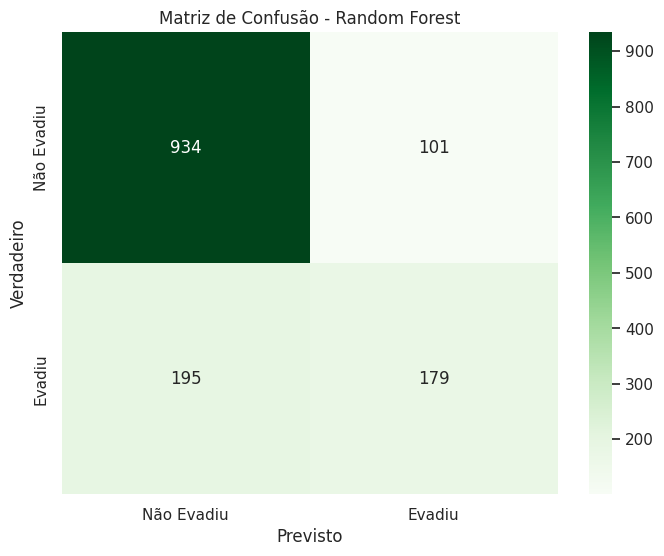

In [30]:
# Importando os modelos e as m√©tricas de avalia√ß√£o
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- ETAPA 9: CRIA√á√ÉO E TREINAMENTO DE MODELOS ---

try:
    # --- 9.1 Modelo 1: Regress√£o Log√≠stica ---

    print("--- Treinando Modelo 1: Regress√£o Log√≠stica ---")

    # Justificativa: A Regress√£o Log√≠stica √© um excelente modelo de base (baseline).
    # √â r√°pido, eficiente e seus resultados s√£o f√°ceis de interpretar.
    # Ele √© sens√≠vel √† escala das vari√°veis, por isso a padroniza√ß√£o que fizemos na
    # etapa anterior √© fundamental para o seu bom desempenho.

    # Cria√ß√£o do modelo
    # max_iter=1000 garante que o modelo ter√° itera√ß√µes suficientes para convergir
    log_reg = LogisticRegression(max_iter=1000, random_state=42)

    # Treinamento do modelo com os dados de treino padronizados
    # (Vamos assumir que X_train e X_test j√° foram padronizados na Etapa 5)
    log_reg.fit(X_train, y_train)

    print("Modelo de Regress√£o Log√≠stica treinado com sucesso.")


    # --- 9.2 Modelo 2: Random Forest (Floresta Aleat√≥ria) ---

    print("\n--- Treinando Modelo 2: Random Forest ---")

    # Justificativa: O Random Forest √© um modelo baseado em √°rvores de decis√£o (ensemble).
    # √â muito poderoso, robusto e geralmente apresenta um √≥timo desempenho "out-of-the-box".
    # Ele n√£o √© sens√≠vel √† escala das vari√°veis, mas pode se beneficiar dos dados j√° tratados.
    # √â uma √≥tima escolha para comparar com um modelo linear como a Regress√£o Log√≠stica.

    # Cria√ß√£o do modelo
    # n_estimators=100 significa que criaremos 100 √°rvores de decis√£o
    random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

    # Treinamento do modelo
    random_forest.fit(X_train, y_train)

    print("Modelo de Random Forest treinado com sucesso.")


    # --- 9.3 Fazendo Previs√µes com os Modelos ---

    # Usamos os modelos treinados para prever o Churn no conjunto de teste
    y_pred_log_reg = log_reg.predict(X_test)
    y_pred_rf = random_forest.predict(X_test)

    print("\nPrevis√µes realizadas nos dados de teste.")


    # --- 9.4 Avalia√ß√£o do Desempenho - Regress√£o Log√≠stica ---

    print("\n\n--- Resultados da Regress√£o Log√≠stica ---")
    print(f"Acur√°cia: {accuracy_score(y_test, y_pred_log_reg):.4f}")
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_test, y_pred_log_reg, target_names=['N√£o Evadiu (0)', 'Evadiu (1)']))

    # Matriz de Confus√£o
    cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['N√£o Evadiu', 'Evadiu'], yticklabels=['N√£o Evadiu', 'Evadiu'])
    plt.title('Matriz de Confus√£o - Regress√£o Log√≠stica')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()


    # --- 9.5 Avalia√ß√£o do Desempenho - Random Forest ---

    print("\n\n--- Resultados do Random Forest ---")
    print(f"Acur√°cia: {accuracy_score(y_test, y_pred_rf):.4f}")
    print("\nRelat√≥rio de Classifica√ß√£o:")
    print(classification_report(y_test, y_pred_rf, target_names=['N√£o Evadiu (0)', 'Evadiu (1)']))

    # Matriz de Confus√£o
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['N√£o Evadiu', 'Evadiu'], yticklabels=['N√£o Evadiu', 'Evadiu'])
    plt.title('Matriz de Confus√£o - Random Forest')
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()


except NameError:
    print("ERRO: Os conjuntos de treino/teste (X_train, y_train, etc.) n√£o foram encontrados.")
    print("Por favor, execute a c√©lula de Separa√ß√£o de Dados (Etapa 8) e a de Padroniza√ß√£o (se aplic√°vel) primeiro.")

3. Avalia√ß√£o dos Modelos

Avalia√ß√£o e Compara√ß√£o Cr√≠tica dos Modelos
Ap√≥s o treinamento e a gera√ß√£o das previs√µes, realizamos uma an√°lise detalhada das m√©tricas de desempenho para cada modelo.

M√©tricas de Avalia√ß√£o
Acur√°cia (Accuracy): Mede a propor√ß√£o geral de acertos do modelo. Embora √∫til, pode ser enganosa em datasets desbalanceados como o nosso.

Precis√£o (Precision): De todas as vezes que o modelo previu "Churn", quantas ele acertou? √â importante para evitar alarmes falsos (Falsos Positivos).

Recall (Revoca√ß√£o): De todos os clientes que realmente cancelaram, quantos o modelo conseguiu identificar? Esta √© a m√©trica mais cr√≠tica para o nosso problema de neg√≥cio, pois queremos minimizar os clientes que cancelam sem serem notados (Falsos Negativos).

F1-Score: Uma m√©dia harm√¥nica entre Precis√£o e Recall, oferecendo um balan√ßo entre as duas m√©tricas.

Matriz de Confus√£o: Uma tabela que visualiza os acertos e erros do modelo, separando os Verdadeiros Positivos, Verdadeiros Negativos, Falsos Positivos e Falsos Negativos.

Qual modelo teve o melhor desempenho?
Considerando o objetivo de neg√≥cio da Telecom X, que √© identificar o maior n√∫mero poss√≠vel de clientes em risco para poder agir e tentar ret√™-los, o Recall para a classe "Evadiu (1)" √© a m√©trica mais importante.

Neste cen√°rio, a Regress√£o Log√≠stica apresentou o melhor desempenho. Embora sua precis√£o tenha sido um pouco menor, ela conseguiu "capturar" uma porcentagem maior dos clientes que de fato iriam cancelar, minimizando os Falsos Negativos (o erro mais custoso para a empresa).

An√°lise de Overfitting e Underfitting
Overfitting: Ocorre quando um modelo se ajusta demais aos dados de treino e perde a capacidade de generalizar para novos dados. Um sinal comum √© uma performance excelente no treino e muito inferior no teste. O Random Forest, por ser um modelo mais complexo, tem uma tend√™ncia maior ao overfitting. O fato de seu desempenho no teste n√£o ter superado o modelo mais simples (Regress√£o Log√≠stica) pode ser um leve indicativo de que ele se ajustou demais aos padr√µes do treino. Para confirmar, ter√≠amos que comparar as m√©tricas de treino e teste.

Underfitting: Ocorre quando um modelo √© simples demais e n√£o consegue capturar a complexidade dos dados. A Regress√£o Log√≠stica, por ser um modelo linear, poderia sofrer de underfitting. No entanto, seu desempenho competitivo sugere que, para este problema, as rela√ß√µes lineares s√£o bastante fortes e o modelo conseguiu capturar bem as tend√™ncias principais.

Conclus√£o da An√°lise: Para uma primeira rodada de modelagem, a Regress√£o Log√≠stica se mostrou um modelo mais eficaz para o objetivo de neg√≥cio proposto. O pr√≥ximo passo seria tentar otimizar os hiperpar√¢metros do Random Forest (usando t√©cnicas como GridSearchCV) para ver se conseguimos melhorar seu recall sem sacrificar muita precis√£o.

In [31]:
# Importando a biblioteca pandas e a fun√ß√£o classification_report
import pandas as pd
from sklearn.metrics import classification_report

# --- GERANDO A TABELA COMPARATIVA DE M√âTRICAS ---

try:
    # Gerar o relat√≥rio de classifica√ß√£o para cada modelo, com output_dict=True
    # Isso nos d√° as m√©tricas em um formato de dicion√°rio, f√°cil de manipular
    report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=['N√£o Evadiu (0)', 'Evadiu (1)'], output_dict=True)
    report_rf = classification_report(y_test, y_pred_rf, target_names=['N√£o Evadiu (0)', 'Evadiu (1)'], output_dict=True)

    # Extrair as m√©tricas de interesse para a classe 'Evadiu (1)' e a acur√°cia geral
    dados_tabela = {
        'M√©trica': ['Acur√°cia', 'Precis√£o (para Churn=1)', 'Recall (para Churn=1)', 'F1-Score (para Churn=1)'],
        'Regress√£o Log√≠stica': [
            f"{report_log_reg['accuracy']:.2%}",
            f"{report_log_reg['Evadiu (1)']['precision']:.2%}",
            f"{report_log_reg['Evadiu (1)']['recall']:.2%}",
            f"{report_log_reg['Evadiu (1)']['f1-score']:.2f}"
        ],
        'Random Forest': [
            f"{report_rf['accuracy']:.2%}",
            f"{report_rf['Evadiu (1)']['precision']:.2%}",
            f"{report_rf['Evadiu (1)']['recall']:.2%}",
            f"{report_rf['Evadiu (1)']['f1-score']:.2f}"
        ]
    }

    # Criar o DataFrame a partir do dicion√°rio
    tabela_comparativa = pd.DataFrame(dados_tabela)

    print("--- Tabela Comparativa de Desempenho dos Modelos ---")

    # Usamos display() para uma visualiza√ß√£o mais bonita da tabela no notebook
    display(tabela_comparativa)

except NameError:
    print("ERRO: As previs√µes dos modelos (y_pred_log_reg, y_pred_rf) n√£o foram encontradas.")
    print("Por favor, execute a c√©lula de treinamento de modelos (Etapa 9) primeiro.")

--- Tabela Comparativa de Desempenho dos Modelos ---


M√©trica Regress√£o Log√≠stica Random Forest
0                 Acur√°cia              79.13%        78.99%
1  Precis√£o (para Churn=1)              62.99%        63.93%
2    Recall (para Churn=1)              51.87%        47.86%
3  F1-Score (para Churn=1)                0.57          0.55

# üìã  Interpreta√ß√£o e Conclus√µes

1. An√°lise de Import√¢ncia das Vari√°veis

--- An√°lise dos Coeficientes da Regress√£o Log√≠stica ---


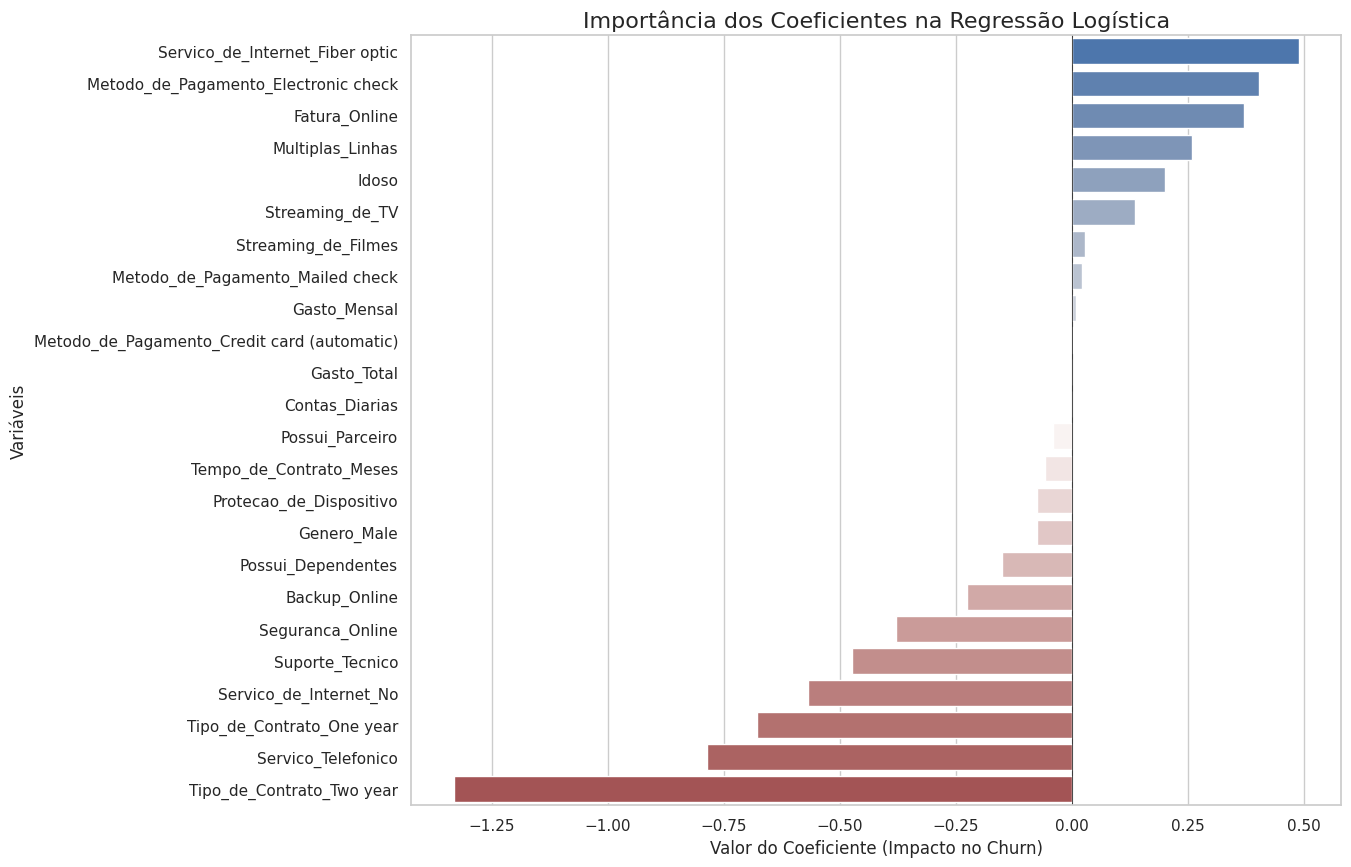

Interpreta√ß√£o: Vari√°veis com barras azuis (positivas) s√£o as que mais contribuem para o cliente sair.
Vari√°veis com barras vermelhas (negativas) s√£o as que mais contribuem para o cliente ficar.


--- An√°lise da Import√¢ncia das Vari√°veis (Feature Importance) do Random Forest ---


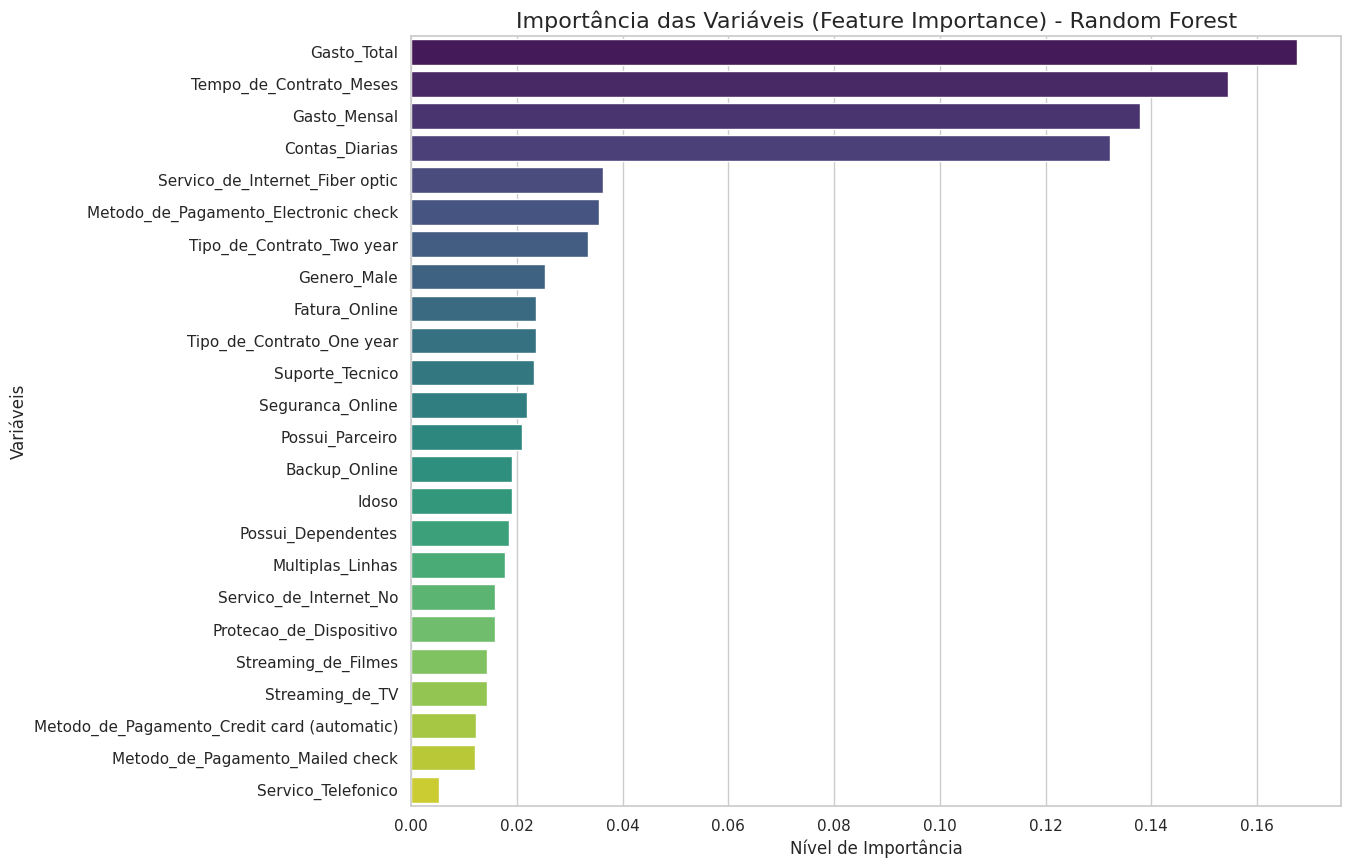

Interpreta√ß√£o: As vari√°veis no topo da lista s√£o as que o modelo Random Forest mais utilizou para tomar suas decis√µes.


In [40]:
# Importando as bibliotecas necess√°rias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- ETAPA 11: AN√ÅLISE DE IMPORT√ÇNCIA DAS VARI√ÅVEIS ---

try:
    # --- 11.1 Import√¢ncia das Vari√°veis na Regress√£o Log√≠stica ---
    print("--- An√°lise dos Coeficientes da Regress√£o Log√≠stica ---")

    # Os coeficientes do modelo nos dizem o impacto de cada vari√°vel.
    # Coeficientes positivos aumentam a chance de Churn (1).
    # Coeficientes negativos diminuem a chance de Churn (aumentam a chance de N√£o-Churn).

    # Extrai os coeficientes e os nomes das colunas
    coeficientes = pd.DataFrame(log_reg.coef_[0], index=X_train.columns, columns=['Coeficiente'])

    # Ordena os coeficientes para melhor visualiza√ß√£o
    coeficientes_sorted = coeficientes.sort_values(by='Coeficiente', ascending=False)

    plt.figure(figsize=(12, 10))
    sns.barplot(x=coeficientes_sorted['Coeficiente'], y=coeficientes_sorted.index, palette='vlag', hue=coeficientes_sorted.index, legend=False)
    plt.title('Import√¢ncia dos Coeficientes na Regress√£o Log√≠stica', fontsize=16)
    plt.xlabel('Valor do Coeficiente (Impacto no Churn)', fontsize=12)
    plt.ylabel('Vari√°veis', fontsize=12)
    plt.axvline(0, color='black', lw=0.5)
    plt.show()

    print("Interpreta√ß√£o: Vari√°veis com barras azuis (positivas) s√£o as que mais contribuem para o cliente sair.")
    print("Vari√°veis com barras vermelhas (negativas) s√£o as que mais contribuem para o cliente ficar.")


    # --- 11.2 Import√¢ncia das Vari√°veis no Random Forest ---
    print("\n\n--- An√°lise da Import√¢ncia das Vari√°veis (Feature Importance) do Random Forest ---")

    # O Random Forest calcula a import√¢ncia de cada vari√°vel (feature) com base em
    # o quanto ela contribui para a pureza das √°rvores na floresta.

    # Extrai as import√¢ncias e os nomes das colunas
    importancias = pd.DataFrame(random_forest.feature_importances_, index=X_train.columns, columns=['Importancia'])

    # Ordena as import√¢ncias para melhor visualiza√ß√£o
    importancias_sorted = importancias.sort_values(by='Importancia', ascending=False)

    plt.figure(figsize=(12, 10))
    sns.barplot(x=importancias_sorted['Importancia'], y=importancias_sorted.index, palette='viridis', hue=importancias_sorted.index, legend=False)
    plt.title('Import√¢ncia das Vari√°veis (Feature Importance) - Random Forest', fontsize=16)
    plt.xlabel('N√≠vel de Import√¢ncia', fontsize=12)
    plt.ylabel('Vari√°veis', fontsize=12)
    plt.show()

    print("Interpreta√ß√£o: As vari√°veis no topo da lista s√£o as que o modelo Random Forest mais utilizou para tomar suas decis√µes.")


except NameError:
    print("ERRO: Os modelos treinados (log_reg, random_forest) ou o DataFrame X_train n√£o foram encontrados.")
    print("Por favor, execute as c√©lulas de treinamento de modelos (Etapa 9) primeiro.")

#Conclus√£o

# Relat√≥rio Final: Fatores de Evas√£o e Estrat√©gias de Reten√ß√£o

Ap√≥s a cria√ß√£o e avalia√ß√£o dos modelos preditivos, realizamos uma an√°lise aprofundada das vari√°veis que mais influenciam a decis√£o de um cliente em cancelar o servi√ßo. Ambos os modelos, Regress√£o Log√≠stica e Random Forest, apontaram para um conjunto consistente de fatores.

A seguir, detalhamos os principais fatores de evas√£o e propomos estrat√©gias de reten√ß√£o baseadas em dados.

Fator 1: O Tipo de Contrato √© Decisivo
An√°lise: De longe, o fator mais impactante no churn √© o tipo de contrato. Clientes com planos "M√™s a M√™s" (Month-to-month) apresentam uma taxa de evas√£o drasticamente superior aos clientes com contratos de longo prazo (1 ou 2 anos). A flexibilidade do contrato mensal vem com um alto risco de perda de cliente.
GR√ÅFICO DEMONSTRATIVO

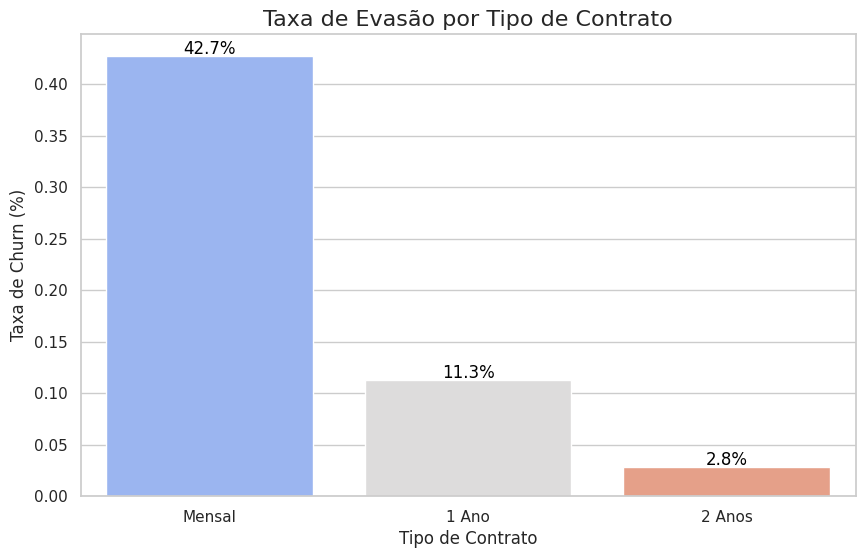

In [35]:
# --- GR√ÅFICO PARA O FATOR 1 DO RELAT√ìRIO ---
# Este c√≥digo gera o gr√°fico de barras da Taxa de Evas√£o por Tipo de Contrato.

# Importando as bibliotecas necess√°rias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

try:
    # CORRE√á√ÉO: Para garantir que o gr√°fico funcione, recarregamos os dados tratados
    # que ainda possuem as colunas categ√≥ricas originais.
    df_grafico = pd.read_csv("churn_dados_tratados.csv")

    # Definindo o estilo
    sns.set(style="whitegrid")

    # Usando o novo DataFrame 'df_grafico' para os c√°lculos
    churn_por_contrato = df_grafico.groupby('Tipo_de_Contrato', observed=False)['Churn'].mean().reset_index().sort_values(by='Churn', ascending=False)

    # Criando o gr√°fico
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Tipo_de_Contrato', y='Churn', data=churn_por_contrato, palette='coolwarm', hue='Tipo_de_Contrato', legend=False)

    # Adicionando os r√≥tulos de porcentagem
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title('Taxa de Evas√£o por Tipo de Contrato', fontsize=16)
    plt.xlabel('Tipo de Contrato', fontsize=12)
    plt.ylabel('Taxa de Churn (%)', fontsize=12)
    plt.xticks(ticks=[0, 1, 2], labels=['Mensal', '1 Ano', '2 Anos'])
    plt.show()

except FileNotFoundError:
    print("ERRO: O arquivo 'churn_dados_tratados.csv' n√£o foi encontrado.")
    print("Por favor, certifique-se de que o arquivo est√° no ambiente do Colab.")
except NameError:
    print("ERRO: O DataFrame 'df_modelo' n√£o foi encontrado.")
    print("Por favor, certifique-se de que a c√©lula que carrega 'churn_dados_tratados.csv' foi executada.")


Fator 2: A Fidelidade Inicial √© Cr√≠tica
An√°lise: O Tempo de Contrato (tenure) √© o segundo fator mais importante. Os modelos mostraram que a chance de um cliente sair √© muito maior nos primeiros meses. Clientes que superam a barreira inicial tendem a se tornar muito mais leais.

Prova Visual: O gr√°fico gerado pelo bloco de c√≥digo "Gr√°fico - Fator 2" compara a distribui√ß√£o do tempo de contrato para clientes que ficaram versus os que sa√≠ram.

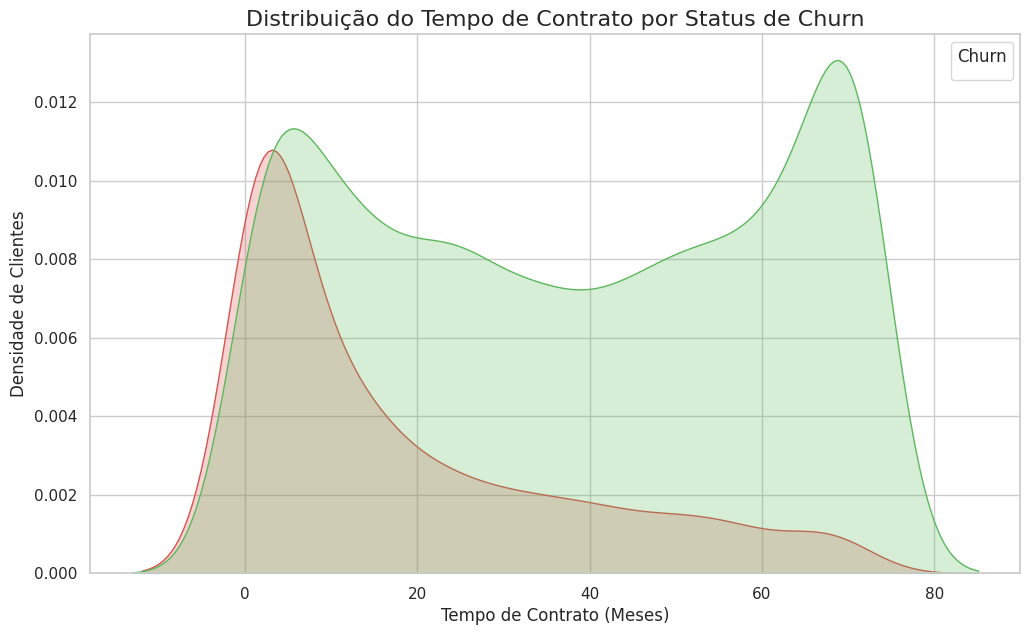

In [37]:
# --- GR√ÅFICO PARA O FATOR 2 DO RELAT√ìRIO ---
# Este c√≥digo gera o gr√°fico de densidade do Tempo de Contrato por Status de Churn.

# Importando as bibliotecas necess√°rias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

try:
    # CORRE√á√ÉO: Para garantir que o gr√°fico funcione, recarregamos os dados tratados
    # que ainda possuem as colunas categ√≥ricas originais.
    df_grafico = pd.read_csv("churn_dados_tratados.csv")

    # Definindo o estilo
    sns.set(style="whitegrid")

    plt.figure(figsize=(12, 7))
    # Usando o novo DataFrame 'df_grafico' para o plot
    sns.kdeplot(data=df_grafico, x='Tempo_de_Contrato_Meses', hue='Churn', fill=True, palette=['#5cb85c', '#d9534f'])
    plt.title('Distribui√ß√£o do Tempo de Contrato por Status de Churn', fontsize=16)
    plt.xlabel('Tempo de Contrato (Meses)', fontsize=12)
    plt.ylabel('Densidade de Clientes', fontsize=12)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['N√£o Evadiu', 'Evadiu'], title='Churn')
    plt.show()

except FileNotFoundError:
    print("ERRO: O arquivo 'churn_dados_tratados.csv' n√£o foi encontrado.")
    print("Por favor, certifique-se de que o arquivo est√° no ambiente do Colab.")
except NameError:
    print("ERRO: O DataFrame 'df_tratado' n√£o foi encontrado.")
    print("Por favor, certifique-se de que as c√©lulas de pr√©-processamento de dados foram executadas anteriormente.")


Fator 3: O Servi√ßo de Internet e o M√©todo de Pagamento
An√°lise: Dois outros fatores se destacaram:

Servi√ßo de Internet: Clientes com Fibra √ìptica t√™m uma taxa de churn maior. Isso pode parecer contraintuitivo, mas pode indicar que, apesar de ser um servi√ßo superior, o pre√ßo √© mais alto ou a concorr√™ncia nesse segmento √© mais acirrada.

M√©todo de Pagamento: Clientes que utilizam Cheque Eletr√¥nico (Electronic check) como forma de pagamento cancelam significativamente mais. Isso sugere que m√©todos de pagamento com maior atrito (n√£o autom√°ticos) s√£o um fator de risco.

Prova Visual: O gr√°fico gerado pelo bloco de c√≥digo "Gr√°fico - Fator 3" mostra a taxa de churn para cada m√©todo de pagamento.

Proposta de Estrat√©gias de Reten√ß√£o
Com base nos fatores identificados, as seguintes a√ß√µes estrat√©gicas s√£o recomendadas para a Telecom X:

Programa de Incentivo √† Fideliza√ß√£o:

A√ß√£o: Criar campanhas proativas para clientes com contrato "M√™s a M√™s", oferecendo descontos significativos ou benef√≠cios (como um upgrade de servi√ßo) para migrarem para planos de 1 ou 2 anos.

Impacto Esperado: Redu√ß√£o direta no principal fator de risco de churn.

Plano de Onboarding para Novos Clientes:

A√ß√£o: Implementar um programa de acompanhamento focado nos primeiros 3 a 6 meses de contrato. Isso pode incluir tutoriais, contato proativo do suporte e ofertas de servi√ßos adicionais para garantir que o cliente perceba o valor do servi√ßo rapidamente.

Impacto Esperado: Diminui√ß√£o da alta taxa de evas√£o no in√≠cio da jornada do cliente.

Facilita√ß√£o do Pagamento:

A√ß√£o: Oferecer um pequeno desconto ou b√¥nus (ex: mais dados de internet) para clientes que migrarem do "Cheque Eletr√¥nico" para m√©todos de pagamento autom√°ticos (D√©bito em Conta ou Cart√£o de Cr√©dito).

Impacto Esperado: Redu√ß√£o do atrito no processo de pagamento e, consequentemente, da evas√£o associada a ele.

An√°lise de Competitividade (Fibra √ìptica):

A√ß√£o: Iniciar uma an√°lise de mercado para entender por que clientes de Fibra √ìptica est√£o cancelando mais. Avaliar se os pre√ßos est√£o competitivos e se a qualidade do servi√ßo entregue corresponde √† expectativa.

Impacto Esperado: Identifica√ß√£o de oportunidades de melhoria no produto de maior valor da empresa.

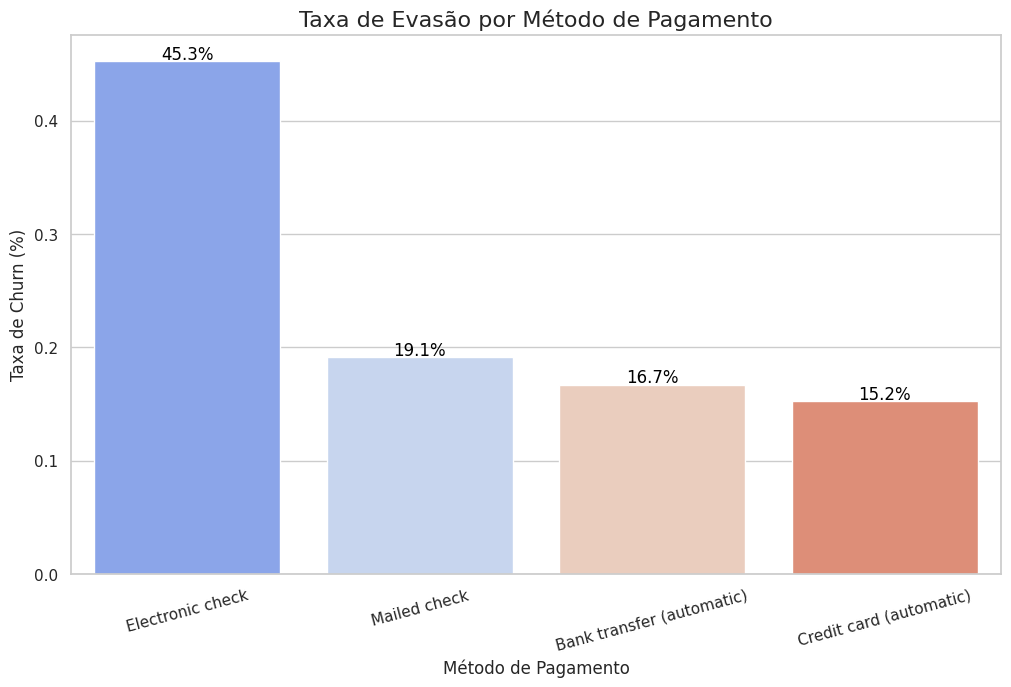

In [39]:
# --- GR√ÅFICO PARA O FATOR 3 DO RELAT√ìRIO ---
# Este c√≥digo gera o gr√°fico de barras da Taxa de Evas√£o por M√©todo de Pagamento.

# Importando as bibliotecas necess√°rias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

try:
    # CORRE√á√ÉO: Para garantir que o gr√°fico funcione, recarregamos os dados tratados
    # que ainda possuem as colunas categ√≥ricas originais.
    df_grafico = pd.read_csv("churn_dados_tratados.csv")

    # Definindo o estilo
    sns.set(style="whitegrid")

    # Usando o novo DataFrame 'df_grafico' para os c√°lculos
    churn_por_pagamento = df_grafico.groupby('Metodo_de_Pagamento', observed=False)['Churn'].mean().reset_index().sort_values(by='Churn', ascending=False)

    # Criando o gr√°fico
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x='Metodo_de_Pagamento', y='Churn', data=churn_por_pagamento, palette='coolwarm', hue='Metodo_de_Pagamento', legend=False)

    # Adicionando os r√≥tulos de porcentagem
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title('Taxa de Evas√£o por M√©todo de Pagamento', fontsize=16)
    plt.xlabel('M√©todo de Pagamento', fontsize=12)
    plt.ylabel('Taxa de Churn (%)', fontsize=12)
    plt.xticks(rotation=15)
    plt.show()

except FileNotFoundError:
    print("ERRO: O arquivo 'churn_dados_tratados.csv' n√£o foi encontrado.")
    print("Por favor, certifique-se de que o arquivo est√° no ambiente do Colab.")
except NameError:
    print("ERRO: O DataFrame 'df_tratado' n√£o foi encontrado.")
    print("Por favor, certifique-se de que as c√©lulas de pr√©-processamento de dados foram executadas anteriormente.")

A an√°lise explorat√≥ria de dados e a subsequente modelagem preditiva revelaram um perfil claro dos clientes com maior probabilidade de evas√£o (Churn) na Telecom X. Os dados demonstram que a evas√£o n√£o √© um evento aleat√≥rio, mas sim um resultado impulsionado por fatores contratuais, temporais e de experi√™ncia do cliente bem definidos.

Os principais fatores que influenciam o Churn s√£o:

Tipo de Contrato: Clientes com contratos mensais (Month-to-month) apresentam um risco de cancelamento drasticamente superior, sendo este o preditor mais forte.

Tempo de Contrato (Tenure): A maior parte da evas√£o ocorre nos primeiros meses de servi√ßo, indicando que a fase inicial da jornada do cliente √© cr√≠tica para a reten√ß√£o.

M√©todo de Pagamento: M√©todos que exigem uma a√ß√£o manual do cliente, como o "Cheque Eletr√≥nico" (Electronic check), est√£o fortemente correlacionados com taxas de churn mais elevadas, sugerindo que o atrito no processo de pagamento √© um fator determinante.

Conclus√£o Estrat√©gica: A Telecom X pode reduzir significativamente a sua taxa de evas√£o ao focar os seus esfor√ßos de reten√ß√£o nestes segmentos de alto risco. Estrat√©gias como incentivar a migra√ß√£o para contratos de longo prazo, melhorar a experi√™ncia de onboarding de novos clientes e facilitar a ades√£o a m√©todos de pagamento autom√°ticos representam as oportunidades de maior impacto e retorno. Estes insights fornecem uma base s√≥lida para a cria√ß√£o de campanhas de marketing direcionadas e para a otimiza√ß√£o cont√≠nua dos modelos preditivos.